## SGD: Stochastic Gradient Descent

<p>En este caso, tendrás que utilizar los datasets de las tareas anteriores y evaluar en cada caso el rendimiento de los modelos con las métricas correspondientes. Utiliza las clases SGDRegressor e SGDClassifier.<p>

## Imports necesarios

In [147]:
import pandas as pd
from sklearn.metrics import mean_squared_error ,r2_score,accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from  scipy.stats import uniform
import numpy as np
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

# SGD Regresión Lineal con dataset de vinos

## Leer el CSV 

In [148]:
vino_df=pd.read_csv("winequality-red.csv")
vino_df.columns=['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Alcohol','Calidad']

vino_df['Densidad'] = vino_df['Densidad'].apply(lambda x: f"{x:,.3f}")
vino_df['Cloruros'] = vino_df['Cloruros'].apply(lambda x: f"{x:,.3f}")
vino_df

,Acido Fijo,Acido Volatil,Acido Citrico,Azucar Residual,Cloruros,Dioxido de sulfuro libre,Dioxido de sulfuro total,Densidad,Ph,Sulfatos,Alcohol,Calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.995,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.995,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.996,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995,3.57,0.71,10.2,5


## Separar los datos en entrenamiento y prueba 80/20 %

In [149]:
X = vino_df[['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Calidad']]

y = vino_df['Alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Entrenar el modelo

In [150]:

escalado=StandardScaler()
escalado.fit(X_train)
X_train=escalado.transform(X_train)
X_test=escalado.transform(X_test)


sgd_regressor = SGDRegressor(max_iter=1000, alpha=0.0001, learning_rate='invscaling', random_state=0)
sgd_regressor.fit(X_train, y_train)

SGDRegressor(random_state=0)

## Error cuadrático medio

In [151]:

y_pred = sgd_regressor.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Regresión Lineal - MSE: {mse:.2f}")
print(f"Regresión Lineal - R²: {r2:.2f}")

Regresión Lineal - MSE: 0.33
Regresión Lineal - R²: 0.72


## Dibujar Gráfica sobre los valores predichos

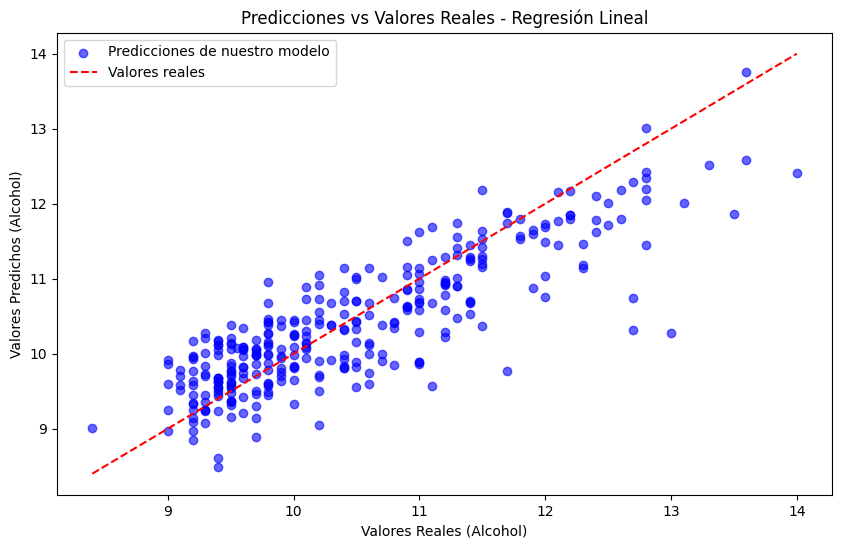

In [152]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones de nuestro modelo')
limites = np.array([min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())])
plt.plot(limites, limites, color='red', linestyle='--', label='Valores reales')
plt.title('Predicciones vs Valores Reales - Regresión Lineal')
plt.xlabel('Valores Reales (Alcohol)')
plt.ylabel('Valores Predichos (Alcohol)')
plt.legend()
plt.show()

# SGD CLASIFICACIÓN DATASET CANCER DE MAMA

## Leer  y tratar el csv

In [153]:
df = pd.read_csv('Breast_Cancer.csv')

df = df.drop("Unnamed: 32",axis=1)

df.columns=["id", "diagnostico", "radio_medio", "textura_media", "perimetro_medio", "area_media", "suavidad_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "media_simetria", "media_dimension_fractal", "radio_se", "textura_se", "perimetro_se"," area_se", "suavidad_se", "compacidad_se", "concavidad_se"," concavo_puntos_se"," simetria_se", "fractal_dimension_peor", "radio_peor", "textura_peor", "perimetro_peor"," area_peor", "suavidad_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"," simetia_peor"," fractal_dimension_peor"]

X_normal = df['radio_medio'].values
y_normal = df['diagnostico']



## Dividir en entrenamiento y prueba


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_normal, y_normal, test_size=0.2, random_state=0)

## Entrenar modelo

In [155]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

clasificador = SGDClassifier(loss='log_loss', alpha=0.01, max_iter=1000, random_state=0)
clasificador.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', random_state=0)

## Matríz de Confusion

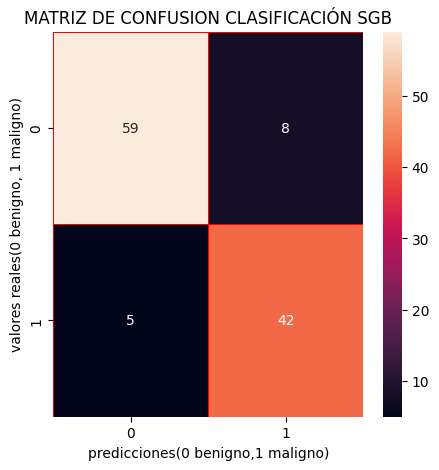

In [156]:
predicciones_clas = clasificador.predict(X_test)

cm= confusion_matrix(y_test,predicciones_clas) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones(0 benigno,1 maligno)")
plt.ylabel("valores reales(0 benigno, 1 maligno)")
plt.title("MATRIZ DE CONFUSION CLASIFICACIÓN SGB")
plt.show()

## Estadísticas de Predicción

In [157]:
# Realizar las predicciones sobre el conjunto de prueba
y_pred = clasificador.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.92      0.88      0.90        67
           M       0.84      0.89      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

